In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [4]:
def pd_print(x):
    pd.set_option('display.max_rows', None)
    display(x)
    pd.set_option('display.max_rows', 20)
    
def np_print(x):
    np.set_printoptions(threshold=np.inf)
    display(x)
    np.set_printoptions(threshold=10)

In [5]:
os.chdir('D:/Dropbox/DataScience/Projects/유저퍼널분석')

## Data load

In [94]:
data = pd.read_csv('funnel_dataset.csv')

In [95]:
data

,ind,user_id,stage
0,1,user_1,homepage
1,2,user_2,homepage
2,3,user_3,homepage
3,4,user_4,homepage
4,5,user_5,homepage
...,...,...,...
17667,9222,user_9222,purchase
17668,9360,user_9360,purchase
17669,9674,user_9674,purchase
17670,9834,user_9834,purchase


## EDA

### Stage별 카운트

In [96]:
user_cnt = data['stage'].value_counts().to_frame().rename(columns={'stage':'유저수'})
user_cnt

,유저수
homepage,10000
product_page,6000
cart,1500
payment,150
purchase,22


### 퍼널 시각화

In [100]:
# Define the funnel stages
funnel_stages = ['homepage', 'product_page', 'cart', 'payment', 'purchase']

# Calculate the number of users for each stage
num_users = []

for stage in funnel_stages:
    stage_users = data[data['stage'] == stage]
    num_users.append(len(stage_users))

In [101]:
num_users

[10000, 6000, 1500, 150, 22]

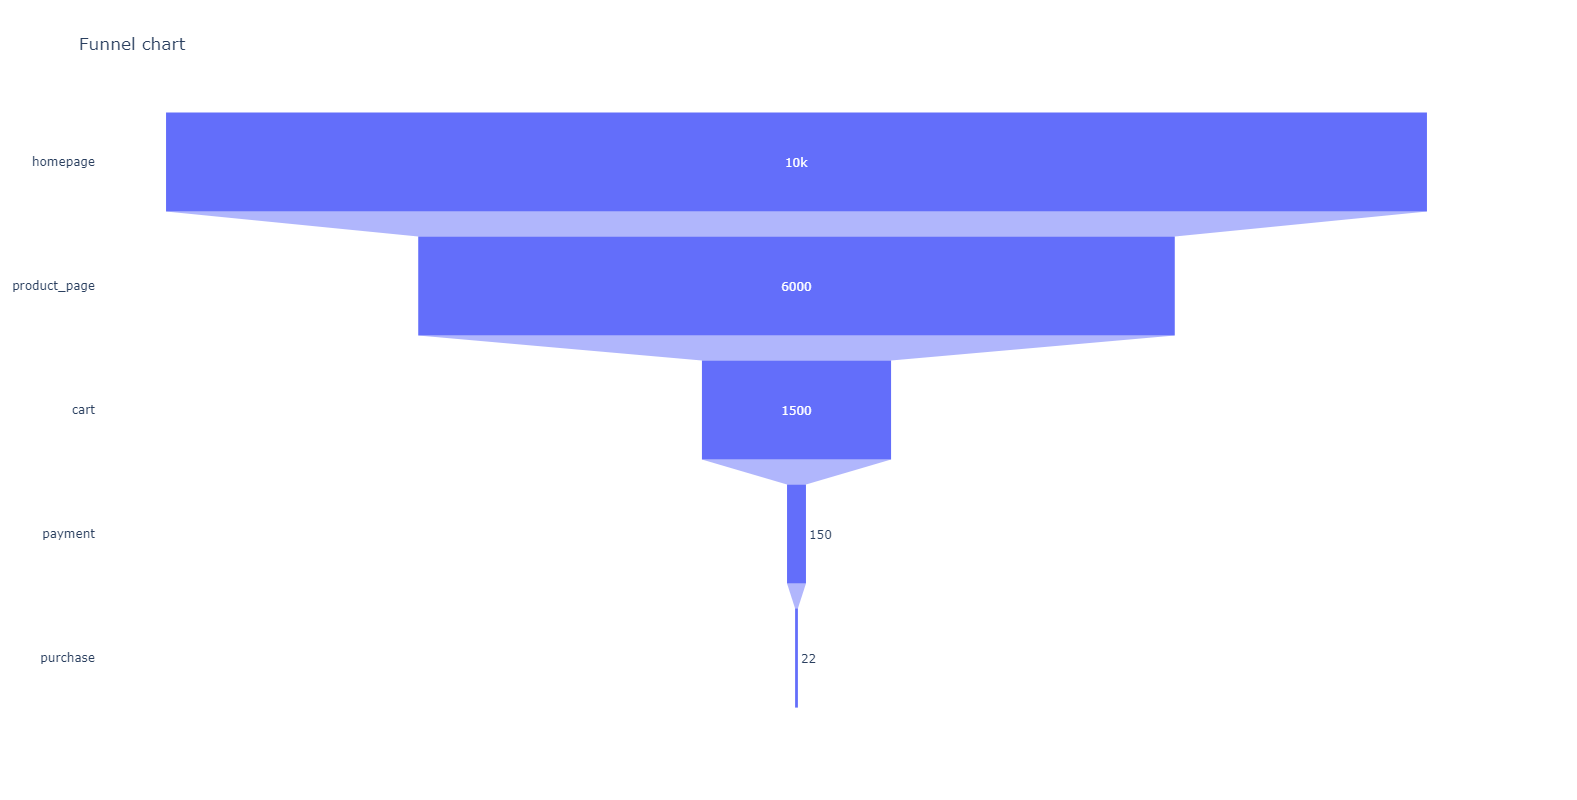

In [102]:
# Create a funnel chart
fig = go.Figure((go.Funnel(y=funnel_stages,
                           x=num_users,
                           textinfo='value',
                           name='Users')))

fig.update_layout(title='Funnel chart',
                 autosize=False,
                 width=800,
                 height=800)
fig.show()

### 전환율

In [105]:
user_cnt['전환율'] = np.round(user_cnt['유저수']/user_cnt['유저수'].shift(1), 3)
user_cnt

,유저수,전환율
homepage,10000,NaN
product_page,6000,0.600
cart,1500,0.250
payment,150,0.100
purchase,22,0.147
